# Arbol de decisión para especies de flores

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier

In [5]:
data = pd.read_csv("datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

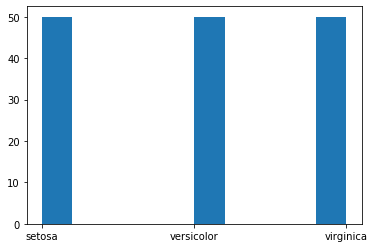

In [7]:
plt.hist(data.Species)

In [8]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
col_names = data.columns.values.tolist()
col_names

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [10]:
predictors = col_names[:4]
target = col_names[4]

In [11]:
data["is_train"] = (np.random.uniform(0,1, len(data))<=0.75)

(array([ 30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 120.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

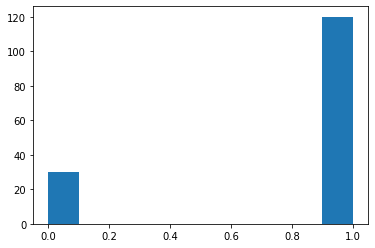

In [12]:
plt.hist(data.is_train.astype(int))

In [13]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [14]:
arbol = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
arbol.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [15]:
preds = arbol.predict(test[predictors])
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [16]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,11,0,0
versicolor,0,9,1
virginica,0,1,8


In [17]:
arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

# Visualización del árbol

In [18]:
from sklearn.tree import export_graphviz

In [19]:
with open("recursos/iris_tree.dot","w") as dotfile:
    export_graphviz(arbol, out_file=dotfile,feature_names=predictors)
    dotfile.close()

In [20]:
from sklearn.datasets import load_iris
from sklearn import tree 
import os
from graphviz import Source

In [21]:
file = open("recursos/iris_tree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.585\\nsamples = 120\\nvalue = [39, 40, 41]"] ;\n1 [label="entropy = 0.0\\nsamples = 39\\nvalue = [39, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 81\\nvalue = [0, 40, 41]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.371\\nsamples = 42\\nvalue = [0, 39, 3]"] ;\n2 -> 3 ;\n4 [label="Sepal.Length <= 4.95\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 38, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 38\\nvalue = [0, 38, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 1, 38]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8

[Text(372.0, 978.48, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [39, 40, 41]'),
 Text(279.0, 761.0400000000001, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(465.0, 761.0400000000001, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 81\nvalue = [0, 40, 41]'),
 Text(279.0, 543.6, 'X[2] <= 5.05\nentropy = 0.371\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(186.0, 326.1600000000001, 'X[0] <= 4.95\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(93.0, 108.72000000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(279.0, 108.72000000000003, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(372.0, 326.1600000000001, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(651.0, 543.6, 'X[2] <= 4.85\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(558.0, 326.1600000000001, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(744.0, 326.1600000000001, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

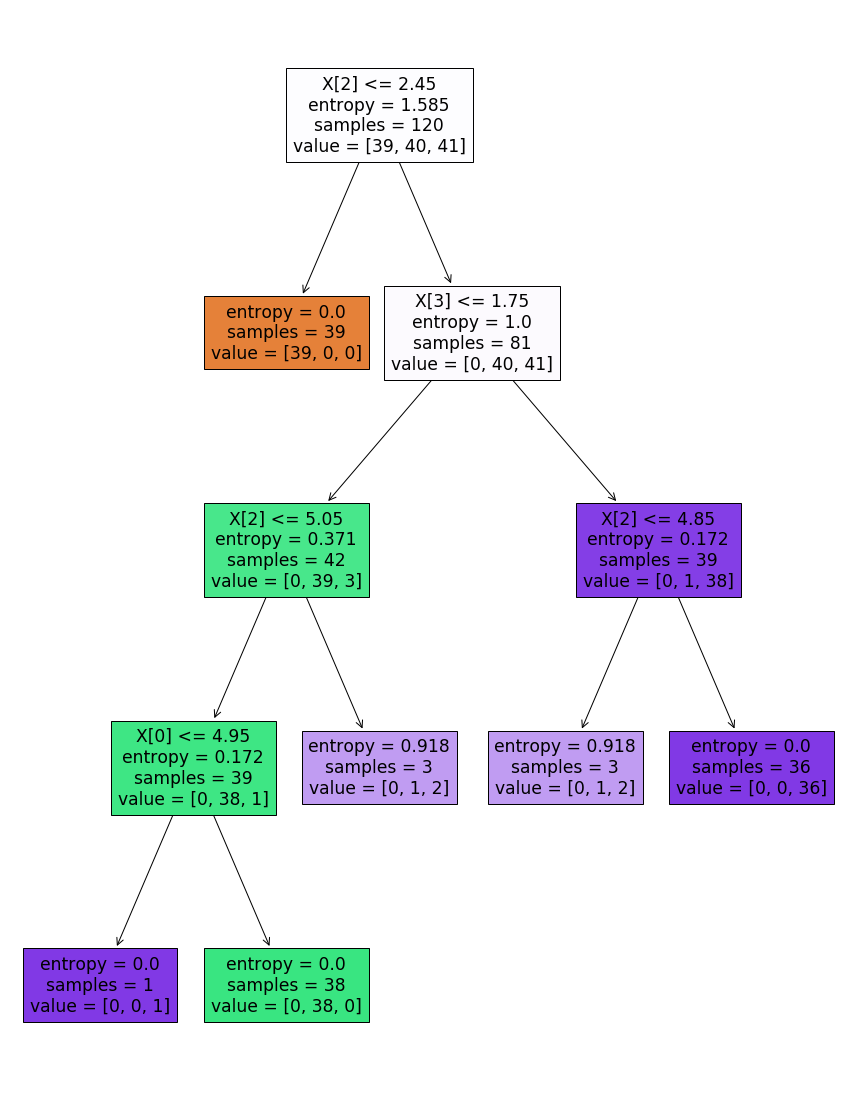

In [22]:
clf = arbol.fit(train[predictors], train[target])
plt.figure(figsize=(15,20))
tree.plot_tree(clf, filled=True)  

# Validación cruzada para la poda

In [23]:
X = data[predictors]
Y = data[target]
arbol = DecisionTreeClassifier(criterion="entropy", max_depth=5,min_samples_split=20, random_state=99)
arbol.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [24]:
from sklearn.model_selection import KFold

In [25]:
cv = KFold(n_splits = X.shape[0], shuffle=True, random_state=1)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(arbol, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
score = np.mean(scores)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
score

0.9466666666666667

In [29]:
for i in range(1,11): 
    arbol = DecisionTreeClassifier(criterion="entropy", max_depth=i,min_samples_split=20, random_state=99)
    arbol.fit(X,Y)
    cv = KFold(n_splits = X.shape[0], shuffle=True, random_state=1)
    scores = cross_val_score(arbol, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i=%d"%i, " es de: %f"%score)
    print("   ",arbol.feature_importances_)

Score para i=1  es de: 0.333333
    [0. 0. 1. 0.]
Score para i=2  es de: 0.953333
    [0.         0.         0.66620285 0.33379715]
Score para i=3  es de: 0.953333
    [0.         0.         0.68976981 0.31023019]
Score para i=4  es de: 0.946667
    [0.         0.         0.66869158 0.33130842]
Score para i=5  es de: 0.946667
    [0.         0.         0.66869158 0.33130842]
Score para i=6  es de: 0.946667
    [0.         0.         0.66869158 0.33130842]
Score para i=7  es de: 0.946667
    [0.         0.         0.66869158 0.33130842]
Score para i=8  es de: 0.946667
    [0.         0.         0.66869158 0.33130842]
Score para i=9  es de: 0.946667
    [0.         0.         0.66869158 0.33130842]
Score para i=10  es de: 0.946667
    [0.         0.         0.66869158 0.33130842]


# Bosque aleatorio

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=300)
forest.fit(data[predictors],data[target])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [56]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [0.99115044, 0.00884956, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.99090909, 0.00909091, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97247706, 0.02752294, 0.        ],
       [0.98319328, 0.01680672, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.98058252, 0.01941748, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [57]:
forest.oob_score_

0.9533333333333334